In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Exercise1 (ODE) 

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_0<t_1<\cdots<t_{N-1}<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider the initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = F(y, t),      & \quad \text{on } [a, b]\\\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(t_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,H,$ and $F$ and return array of all $t_k$ and $y_k$ of \eqref{eul2} using Euler method i.e.
$$ y_{k+1} = y_k + HF(y_k, t_k) $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import warnings
warnings.filterwarnings('ignore')


In [17]:
def  EulerMethod(a,b,c,H,F):
    N=int((b-a)/H+1)
    t=np.linspace(a,b,N)
    y=np.zeros((len(t),len(c)))
    y[0]=c
    for k in range (len(t)-1):
        y[k+1]=y[k]+H*F(y[k],t[k])
    return t,y
        

2. Write a python function <b> EulerMethodModif </b> that takes $a,b,c,H,$ and $F$ and return array of all $t_k$ and $y_k$ of (1) using the modified implicit euler method i.e.
\begin{equation*}
\begin{cases}
\alpha = HF(y_k, t_k)\\\\
\beta = HF(y_k + \alpha, t_k +H)\\\\
y_{k+1} = y_k + \dfrac{\alpha + \beta}{2}
\end{cases}
\end{equation*}


In [16]:
def EulerMethodModif(a,b,c,H,F):
    N=int((b-a)/H+1)
    t=np.linspace(a,b,N)
    y=np.zeros((len(t),len(c)))
    y[0]=c
    for k in range (len(t)-1):
        alpha=H*F(y[k],t[k])
        beta=H*F(y[k]+alpha,t[k]+H)
        y[k+1]=y[k]+(alpha+beta)/2
    return t,y

3. Let us consider the initial value problem 

\begin{equation*}
  \begin{cases}
    z'' = 6z' -5z,      & \quad \text{on } [0, 1]\\\\
    z(0) = 1, z'(0) = 3
  \end{cases}\quad \quad (2)
\end{equation*}
Using the characteristic equation, find and type the exact solution of the second order ODE (2) in the Markdown cell below. 


$$ z(t)= \cfrac{1}{2}e^{5x}+\cfrac{1}{2}e^{x} $$

4. Define in the Code cell below the function $F$ such that the second order ODE (2) is equivalent to the first order ODE (1)

In [13]:
def F(y,t):
    u,v=y
    dudt=v
    dvdt=6*v-5*u
    return np.array([dudt,dvdt])

    

In [18]:
a=0
b=1
c=np.array([1,3])
H=0.01
N=101
exact_sol_Euler=EulerMethod(a,b,c,H,F)[1][:,0]

In [10]:
exact_sol_EulerModi=EulerMethodModif(a,b,c,H,F)[1][:,0]

5. Compare graphically the exact and numerical solution of (2) using <b> odeint </b>

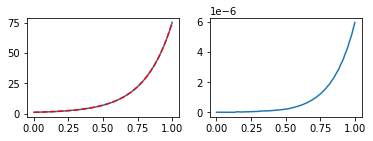

In [19]:
t=np.linspace(a,b,N)
sol=odeint(F,c,t)[:,0]
exact=1/2*(np.exp(5*t)+np.exp(t))
error_odeint=abs(exact-sol)

plt.subplot(2,2,1)
plt.plot(t,exact)
plt.plot(t,sol,'r--')
plt.subplot(2,2,2)
plt.plot(t,error_odeint);

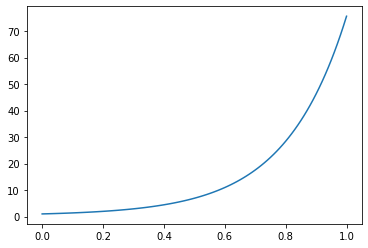

In [20]:
plt.plot(t,sol);

6. Compare graphically the exact and numerical solution of (2) using <b> EulerMethod </b>

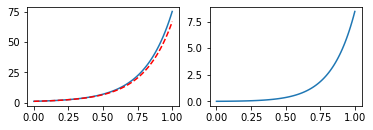

In [21]:
error_euler=abs(exact-exact_sol_Euler)

plt.subplot(2,2,1)
plt.plot(t,exact)
plt.plot(t,exact_sol_Euler,'r--')
plt.subplot(2,2,2)
plt.plot(t,error_euler);

7. Compare graphically the exact and numerical solution of (2) using <b> EulerMethodModif </b>

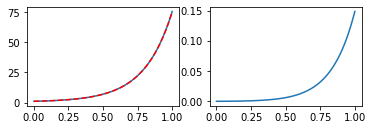

In [22]:
error_euler=abs(exact-exact_sol_EulerModi)

plt.subplot(2,2,1)
plt.plot(t,exact)
plt.plot(t,exact_sol_EulerModi,'r--')
plt.subplot(2,2,2)
plt.plot(t,error_euler);

8. Which method give a better approximation of the exact solution? Why?

### odeint method is better than others because it's error is closest zero

# Exercise 2 (IPS) 

Let $X$ be Binomial r.v. with parameter $(n,p)$ and $Y$ be a Poisson r.v. with parameter $\lambda$.
Under some conditions on $n$, $p$ and $\lambda$, the binomial distribution can be approximated by the Poisson distribution which can be itself approximated by a gaussian distribution.
The goal of the exercise is to experiment these conditions empirically.

In [23]:
from scipy.stats import norm, poisson, binom
#norm,poisson,binom can be used for normal, poisson and binomial distr. (resp)

1. Represent the bar plot of $P(X=x)$ for $x=0,1,\ldots,n$  with $n=25$ and $p = 0.1$


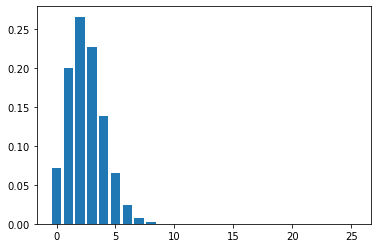

In [24]:
rvX=binom(25,0.1)
binomial=np.zeros(26)
for i in range(26):
    binomial[i]=rvX.pmf(i)
binomial

i=np.arange(26)

plt.bar(i,binomial);
    

2. Represent the bar plot of $P(Y=y)$ for $y \in \mathbb{N}$. Choose an appropriate value for $\lambda$ relying on $n$ and $p$ such that $P(Y=y)$ is 
an approximation of $P(X=x)$.


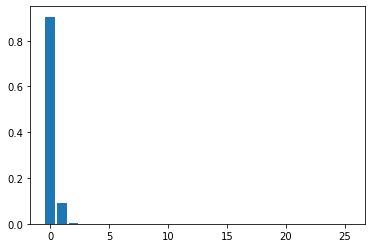

In [26]:
rvY=poisson(0.1)
poissonn=np.zeros(26)
for i in range(26):
    poissonn[i]=rvY.pmf(i)
poissonn

i=np.arange(26)

plt.bar(i,poissonn);

## the appropriate value of $\lambda$ is $\lambda=np=25\times 0.1=2.5$

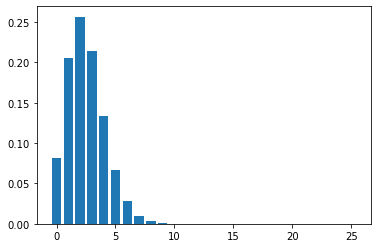

In [27]:
rvY=poisson(2.5)
binomial1=np.zeros(26)
for i in range(26):
    binomial1[i]=rvY.pmf(i)
binomial1

i=np.arange(26)

plt.bar(i,binomial1);

3. Represent a comparison bar plot of $P(X=x)$ and $P(Y=y)$.

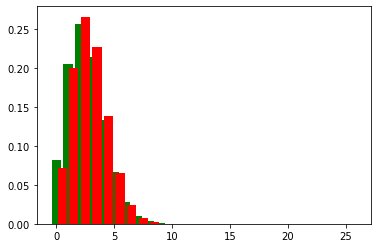

In [30]:
plt.bar(i+0.00,binomial1,color='g')
plt.bar(i+0.5,binomial,color='r');

4. Fit a normal distribution on $P(Y=y)$ by drawing a bell curve on $P(Y=y)$. Hint: choose the appropriate expectation and variance of the normal distribtion (Note that $E[Y] = Var[Y] = \lambda$) 

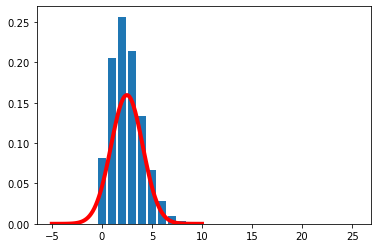

In [28]:
plt.bar(i,binomial1)
t=np.linspace(-5,10,100)
norm=1/(2*np.pi)**(1/2)*1/2.5*np.exp(-1/2*(t-2.5)**2/2.5)
plt.plot(t,norm,'r-',linewidth=4);

# Pandas part

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. load titanic dataset from seaborn

In [3]:
data=sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 2.count the number of missing value in each column

In [4]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 3.Remove missing value

In [5]:
data1=data.dropna()
data1 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


## 4.Size of clean dataset

In [6]:
data1.shape

(182, 15)

## 5.Count the number of survived female

In [7]:
a=data1[data1['sex']=='female']
a['survived'].sum()

82

## 6.Average ages of males who di not survived

In [8]:
a1=data1[data1['sex']=='male']
w=a1[a1['survived']==0]
w['age'].mean()

42.84905660377358

## 7.reproduce the following figure

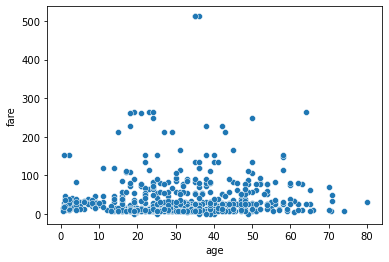

In [9]:
sns.scatterplot(x='age', y='fare', data=data);

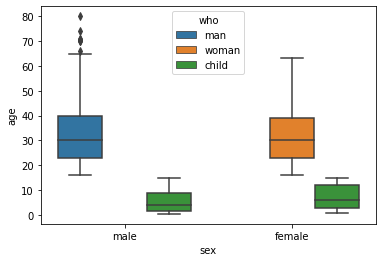

In [10]:
sns.boxplot(data=data, x='sex',y='age',hue='who');

<AxesSubplot:xlabel='pclass', ylabel='age'>

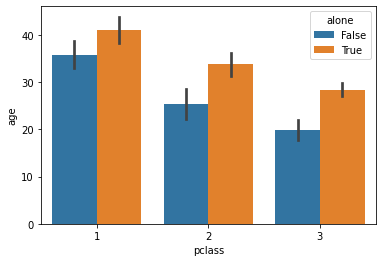

In [11]:
sns.barplot(data=data, x='pclass', y='age',hue='alone')

##  8.building of the logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [13]:
X=data1[['pclass','age','parch','fare']].values
y=data1[['survived']].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Confusion matrix

In [17]:
con=confusion_matrix(y_test,y_pred)
con

array([[ 3,  7],
       [ 2, 25]])

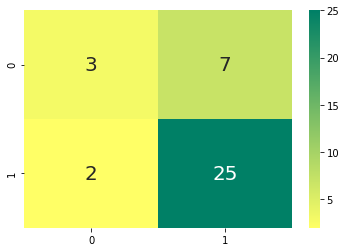

In [20]:
sns.heatmap(con,annot=True,annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(data.survived),
           yticklabels=np.unique(data.survived));

### Accuracy

In [19]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7567567567567568
